In [1]:
import numpy as np

In [442]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def softmax(x):
    x = x - np.max(x,axis=1).reshape(-1,1)
    return np.exp(x)/np.sum(np.exp(x),axis=1).reshape(-1,1)

In [181]:
def cross_entropy_error(y,t):
    return -np.sum(t*np.log(y))/len(t)

In [ ]:
def cross_entropy_error(y,t):
    return -np.sum(t*np.log(y))/y.shape[0]

In [170]:
len(np.random.randn(10,2))

10

In [3]:
input_x = np.random.randn(3,2)

In [7]:
t = np.array(['monkey','cat','dog'])

In [15]:
t = np.array([[0],[1],[2]])

In [12]:
input_x

array([[ 0.1891208 , -0.89899271],
       [ 0.89482329,  2.39401176],
       [ 1.53608315,  0.08338061]])

In [26]:
w = np.random.randn(2,3)

In [27]:
output = np.dot(input_x,w)

In [41]:
output

array([[-0.75115977, -0.07647734,  0.39584385],
       [ 2.15954761,  1.15649617, -1.36670187],
       [ 0.24654978,  1.06565827, -0.38396959]])

In [68]:
np.sum(softmax(output),axis=1)

array([1., 1., 1.])

In [42]:
output - np.max(output,axis=1).reshape(-1,1)

array([[-1.14700362, -0.47232119,  0.        ],
       [ 0.        , -1.00305145, -3.52624948],
       [-0.81910849,  0.        , -1.44962786]])

In [23]:
t = np.array([[1,0,0],[0,1,0],[0,0,1]])

In [70]:
softmax(output)

array([[0.16360846, 0.32123039, 0.51516115],
       [0.7162433 , 0.26268838, 0.02106832],
       [0.26310307, 0.59684315, 0.14005378]])

In [74]:
def loss(y,t):
    return np.sum(t*np.log(y))/y.shape[0]

In [75]:
loss(softmax(output),t) # 미분하여

-1.7042649108246497

In [82]:
def f(x):
    return np.sum(x**2)

In [83]:
f(np.array([3,4]))

25

In [92]:
def _diff(f,x):
    h = 1e-7
    fx = f(x)
    tmp_val = x
    x = tmp_val + h
    fxh = f(x)
    return (fxh-fx)/h

In [102]:
_diff(f,np.array([3,4]))

14.000000234659637

In [98]:
np.argmax(softmax(output),axis=1)

array([2, 0, 1])

In [100]:
np.argmax(t,axis=1)

array([0, 1, 2])

In [103]:
def _diff(f,x):
    h = 1e-7
    fx = f(x)
    tmp_val = x
    x = tmp_val + h
    fxh = f(x)
    return (fxh-fx)/h

In [130]:
x = np.random.randn(10,3)
x.ndim

2

In [153]:
tmp_val = x[0,0]

In [156]:
f = lambda x:x**2

In [157]:
fxh = f(x)

In [158]:
fxh

array([[ 1.00060009,  4.        ,  9.        ],
       [ 4.        ,  9.        , 49.        ]])

In [155]:
x[i,j] = tmp_val + h
x[i,j]

1.0003

In [412]:
def numerical_gradient(f,x):
    h = 1e-4
    grad = np.zeros_like(x)
    if x.ndim == 2: 
        for i in range(grad.shape[0]):
            for j in range(grad.shape[1]):
                fx = f(x[i,j])
                tmp_val = x[i,j]
                x[i,j] = tmp_val + h
                fxh = f(x[i,j])
                grad[i,j] = (fxh - fx)/h
                x[i,j] = tmp_val
        return grad
    else:
        for i in range(x.size):
            tmp_val = x[i]
            x[i] = tmp_val + h
            fxh1 = f(x[i])
            x[i] = tmp_val - h
            fxh2 = f(x[i])
            grad[i] = (fxh1-fxh2)/2*h
            x[i] = tmp_val
        return grad

In [413]:
def mse(y,t):
    return np.sum((y-t)**2)/len(y)

In [414]:
class Network:
    def __init__(self):
        self.W = np.random.randn(2,2)
        self.b = np.random.randn(1)
        
    def predict(self,x):
        return np.dot(x,self.W) + self.b
    
    def loss(self,x,t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y,t)
        return loss

In [ ]:
def cross_entropy_error(y,t):
    return -np.sum(t*np.log(y))/y.shape[0]

In [428]:
from sklearn.datasets import load_iris

In [429]:
X = load_iris()['data']
y = load_iris()['target']

In [435]:
t = np.zeros((150,3))
for i in range(150):
    t[i,y[i]] = 1

In [457]:
input_size = X.shape[1]
hidden_size = 5
output_size = t.shape[1]

In [458]:
network = TwoLayerNet(input_size,hidden_size,output_size)

In [506]:
def train(epochs,learning_rate,x,t):
    for epoch in range(epochs):
        grads = network.numerical_gradient(x,t)
        for key in grads.keys():
            network.W[key] -= learning_rate*grads[key]
        print("==========>loss  ", network.loss(x,t), "  =====>  ",network.accuracy(x,t))
        

In [509]:
network.accuracy(X,t)

0.9733333333333334

In [511]:
np.argmax(t,axis=1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [510]:
np.argmax(network.predict(X),axis=1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [459]:
lr = 0.0001
epochs = 100
for epoch in range(epochs):
    grads = network.numerical_gradient(X,t)
    W1, W2 = network.numerical_gradient(X,t)['W1'], network.numerical_gradient(X,t)['W2']
    b1, b2 = network.numerical_gradient(X,t)['b1'], network.numerical_gradient(X,t)['b2']
    network.W['W1'] -= lr*W1
    network.W['W2'] -= lr*W2
    network.W['b1'] -= lr*b1
    network.W['b2'] -= lr*b2

In [482]:
X = load_iris()['data']
y = load_iris()['target']
t = np.zeros((150,3))
for i in range(150):
    t[i,y[i]] = 1
input_size = X.shape[1]
hidden_size = 10
output_size = t.shape[1]
network = TwoLayerNet(input_size,hidden_size,output_size)

In [536]:
def relu(x):
    return np.maximum(0,x)

In [537]:
class TwoLayerNet:
    def __init__(self,input_size,hidden_size,output_size):
        self.W = {}
        self.W['W1'] = np.random.randn(input_size,hidden_size)
        self.W['b1'] = np.random.randn(hidden_size)
        self.W['W2'] = np.random.randn(hidden_size,output_size)
        self.W['b2'] = np.random.randn(output_size)
        self.loss_val = []
    
    def predict(self,x):
        W1 = self.W['W1']
        W2 = self.W['W2']
        b1 = self.W['b1']
        b2 = self.W['b2']
        
        a1 = np.dot(x,W1) + b1 # 출력값
        z1 = relu(a1)
        a2 = np.dot(z1,W2) + b2
        out = softmax(a2)
        return out
    
    def loss(self,x,t):
        y = self.predict(x)
        loss = cross_entropy_error(y,t)
        return loss

    def numerical_gradient(self,x,t):
        f = lambda W: self.loss(x,t)
        
        grads = {}
        grads['W1'] = numerical_gradient(f, self.W['W1'])
        grads['b1'] = numerical_gradient(f, self.W['b1'])
        grads['W2'] = numerical_gradient(f, self.W['W2'])
        grads['b2'] = numerical_gradient(f, self.W['b2'])
        
        return grads

    
    def accuracy(self,x,t):
        y = self.predict(x)
        y = np.argmax(y,axis=1)
        t = np.argmax(t,axis=1)
        acc = sum(y == t)/x.shape[0]
        return acc
    
    def train(self,epochs,lr,x,t):
        for epoch in range(epochs):
            grads = self.numerical_gradient(x,t)
            for key in grads.keys():
                self.W[key] -= lr*grads[key]
            self.loss_val.append(self.loss(x,t))
        

In [544]:
from sklearn.model_selection import train_test_split

In [545]:
X = load_iris()['data']
y = load_iris()['target']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2)
t_train = np.zeros((y_train.size,np.unique(y_train).size))
for i in range(len(t_train)):
    t_train[i,y_train[i]] = 1
t_test = np.zeros((y_test.size,np.unique(y_test).size))
for i in range(len(t_test)):
    t_test[i,y_test[i]] = 1
input_size = X_train.shape[1]
hidden_size = 5
output_size = t_train.shape[1]
network = TwoLayerNet(input_size=input_size,hidden_size=hidden_size,output_size=output_size)

In [546]:
network.train(10000,1e-3,X_train,t_train)

In [547]:
network.accuracy(X_test,t_test)

0.9666666666666667

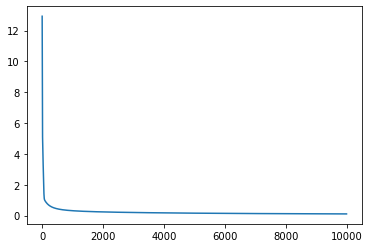

In [548]:
import matplotlib.pyplot as plt
plt.plot(np.arange(len(network.loss_val)),network.loss_val)

In [418]:
network.numerical_gradient()

In [419]:
epochs = 10000
lr = 1e-5
for epoch in range(epochs):
    net.W = net.W - lr*numerical_gradient(f,net.W)

In [420]:
epochs = 10000
lr = 1e-5
for epoch in range(epochs):
    net.b = net.b - lr*numerical_gradient(f,net.b)

In [421]:
net.W

array([[-0.32131844, -0.63825576],
       [-0.75639995,  0.08016968]])

In [422]:
net.predict(X)

array([[-1.65038309, -1.65038309],
       [-2.40678304, -1.57021341],
       [-1.97170153, -2.28863885],
       [-2.72810147, -2.20846918]])

In [423]:
np.argmax(net.predict(X),axis=1)

array([0, 1, 0, 1])

In [424]:
print(net.W)
print(net.b)

[[-0.32131844 -0.63825576]
 [-0.75639995  0.08016968]]
[-1.65038309]


In [425]:
np.argmax(t,axis=1)

array([0, 0, 0, 1])

In [163]:
x = np.array([1.,2.,3.])
loss = cross_entropy_error(y,t)
numerical_gradient(,x)

array([2.e-08, 4.e-08, 6.e-08])

In [161]:
numerical_gradient(f,x)

array([[ 2.0001,  4.0001,  6.0001],
       [ 4.0001,  6.0001, 14.0001]])

In [117]:
f(np.array([1,2,3]))

array([1, 4, 9])

In [124]:
x = np.random.randn(2,3,3)

In [125]:
np.zeros_like(x)

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])

In [122]:
np.zeros((x.shape[0],x.shape[1]))

array([[0., 0., 0.],
       [0., 0., 0.]])